## Name : Neha Reddy M
## Class : 10
## School : Bangalore International Academy
## Student ID : 197816

# Importing Libraries

In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading Dataset

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Text,Category
0,we're looking for someone with a more aestheti...,Appearance Discrimination
1,we're looking for someone with a more appealin...,Appearance Discrimination
2,we're looking for someone with a more attracti...,Appearance Discrimination
3,we're looking for someone with a more attracti...,Appearance Discrimination
4,we're looking for someone with a more attracti...,Appearance Discrimination


# Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Text,Category
0,we're looking for someone with a more aestheti...,Appearance Discrimination
1,we're looking for someone with a more appealin...,Appearance Discrimination
2,we're looking for someone with a more attracti...,Appearance Discrimination
3,we're looking for someone with a more attracti...,Appearance Discrimination
4,we're looking for someone with a more attracti...,Appearance Discrimination


In [4]:
df.columns

Index(['Text', 'Category'], dtype='object')

In [5]:
print('length of data is', len(df))

length of data is 1539


In [6]:
df.shape

(1539, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      1539 non-null   object
 1   Category  1539 non-null   object
dtypes: object(2)
memory usage: 24.2+ KB


In [8]:
df.dtypes

Text        object
Category    object
dtype: object

In [9]:
np.sum(df.isnull().any(axis=1))

0

In [10]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   2
Count of rows in the data is:   1539


In [11]:
df['Category'].unique()

array(['Appearance Discrimination', 'Gender Discrimination',
       'No Discrimination', 'Social Class Discrimination'], dtype=object)

In [12]:
df['Category'].nunique()

4

# Data Visualisation

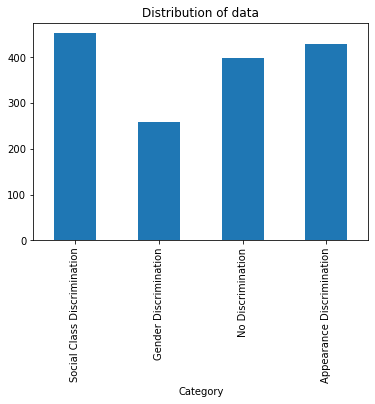

In [13]:
ax = df.groupby('Category').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Social Class Discrimination','Gender Discrimination','No Discrimination','Appearance Discrimination'], rotation=90)
text, sentiment = list(df['Text']), list(df['Category'])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Appearance Discrimination'),
  Text(1, 0, 'Gender Discrimination'),
  Text(2, 0, 'No Discrimination'),
  Text(3, 0, 'Social Class Discrimination')])

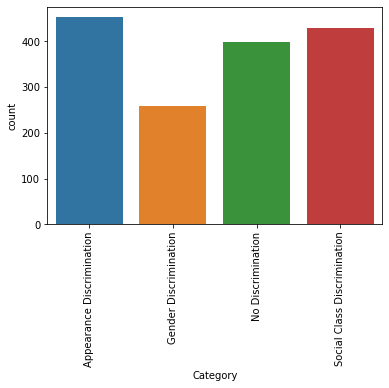

In [14]:
sns.countplot(x='Category', data=df)
plt.xticks(rotation=90)

# Data Processing

In [15]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

In [16]:
df['new_text'] = df['Text'].apply(preprocess_text)
df.head()

,Text,Category,new_text
0,we're looking for someone with a more aestheti...,Appearance Discrimination,looking someone aesthetically pleasing face role
1,we're looking for someone with a more appealin...,Appearance Discrimination,looking someone appealing body type position
2,we're looking for someone with a more attracti...,Appearance Discrimination,looking someone attractive appearance role
3,we're looking for someone with a more attracti...,Appearance Discrimination,looking someone attractive body shape role
4,we're looking for someone with a more attracti...,Appearance Discrimination,looking someone attractive facial structure role


(-0.5, 399.5, 199.5, -0.5)

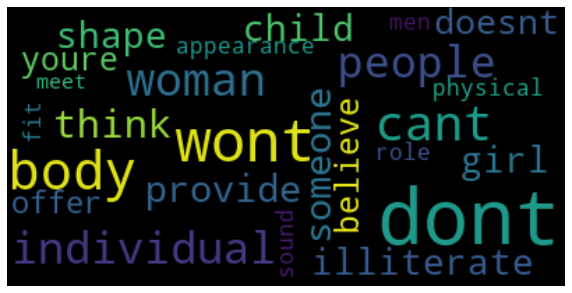

In [17]:
from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(collocations=False, max_font_size=55, max_words=25, background_color="black")
wc.generate(' '.join(df.new_text))
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

# Modelling

### Feature Extraction

In [18]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['new_text'])
y = df['Category']

### Splitting dataset into test and train sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Model

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Evaluate the model

In [21]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                             precision    recall  f1-score   support

  Appearance Discrimination       0.99      0.96      0.97        89
      Gender Discrimination       1.00      0.88      0.94        50
          No Discrimination       0.92      0.99      0.95        88
Social Class Discrimination       0.93      0.95      0.94        81

                   accuracy                           0.95       308
                  macro avg       0.96      0.94      0.95       308
               weighted avg       0.95      0.95      0.95       308



### Model accuracy on test and train set

In [22]:
print("model accuracy on test set: ", {model.score(X_test, y_test)})
print("model accuracy on train set: ", {model.score(X_train, y_train)})

model accuracy on test set:  {0.9512987012987013}
model accuracy on train set:  {0.9926888708367181}


# Testing

In [23]:
texts = ["Discrimination needs to be stopped", "People dont accept me as a part of the state", "You can't be a part of our team"]
texts_features = vectorizer.transform(texts)
predictions = model.predict(texts_features)
print(predictions)

['No Discrimination' 'Social Class Discrimination'
 'Appearance Discrimination']


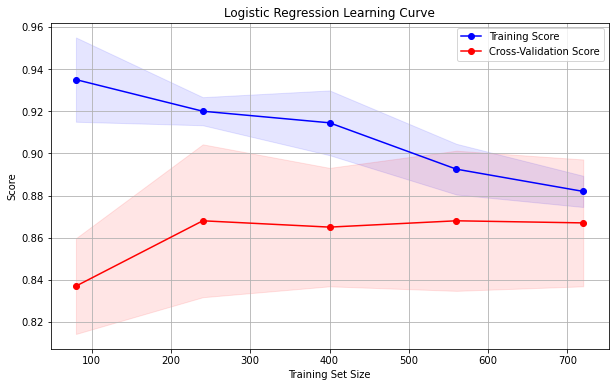

In [24]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
classifier = LogisticRegression()
train_sizes_abs, train_scores, test_scores = learning_curve(
    classifier, X, y, train_sizes=train_sizes, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.title('Logistic Regression Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='b')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='r')
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color='b',
         label='Training Score')
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color='r',
         label='Cross-Validation Score')
plt.legend(loc='best')
plt.show()

# Pickling the file

In [25]:
import pickle
filename = 'discrimination.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [26]:
filename = 'discrimination.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)